# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [572]:
# Libraries (starting from)
# Part 1 - EDA:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2 - Preprocessing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Part 3 - Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [171]:
# Load dataset
df = pd.read_csv('diabetes.csv')

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [56]:
print(f"Shape: {df.shape}")
df.head()

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
# I also want to see the outcome ratio (roughly 35% have diabetes):
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [102]:
# As well as number of unique values:
df.agg(['nunique'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
nunique,17,136,47,51,186,248,517,52,2


### Are there any missing values in the dataset?
#### Answer: Probably, although there are no NaNs.

The details chart (`df.describe()`) shows that Glucose, BloodPressure, and BMI have minimum values of 0. While the same can be said for Insulin and SkinThickness, later visualisations show that a value of 0 is not considered an outlier. This could represent a large subset of missing data, but to be sure they are missing and not accurate I decided to check value counts to see if there were any nearby values (e.g. to make sure we don't have like 100 Insulin values of 1, which would indicate that Insulin:0 could be normal).

I started by checking the df for NaNs:

In [18]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Followed by value counts (Note: I chose to do it this way as opposed to rendering a series of scatter plots, which are present in a scatter matrix, to save on costs/rendering times and also show definitive proof that there are no close values, such as 1s or 2s):

In [114]:
# Check number counts
print("Glucose: ", df['Glucose'].value_counts().sort_index())
print("BloodPressure: ", df['BloodPressure'].value_counts().sort_index())
print("BMI: ", df['BMI'].value_counts().sort_index())
print("Insulin: ", df['Insulin'].value_counts().sort_index())
print("SkinThickness: ", df['SkinThickness'].value_counts().sort_index())

Glucose:  0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64
BloodPressure:  0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64
BMI:  0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64
Insulin:  0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: Insulin, Length: 186, dtype: 

This confirms that, in these categories, a value of 0 means it is missing. It is not abnormal for someone to have never been pregnant, and no other category has a minimum value of 0 so they do not need to be assessed.

### Are there any outliers in the predictor variables?
#### Answer: Yes

### What is the distribution of each predictor variable?
#### Anser: See violin plots below.

### How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
#### Answer: There tends to be more variation among individuals with diabetes, but median values are higher for every value except Insulin (which has a lot of missing data, so this could be wrong), and overall the data tends to have less of a skew to it than it does for non-diabetic individuals.

Note: I chose to double certain comparable visualizations to save space, but I only did so for columns on a similar scale (based on Max value).

I also used both box plots, for clearer display of outliers, and violin plots, for spread/distribution.

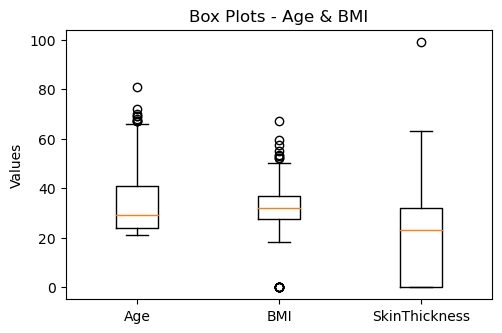

In [47]:
# For Age, BMI, & Skin Thickness
columns = ['Age', 'BMI', "SkinThickness"]

# Create the box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot(df[columns], labels=columns)
plt.ylabel('Values')
plt.title('Box Plots - Age & BMI')
plt.show()

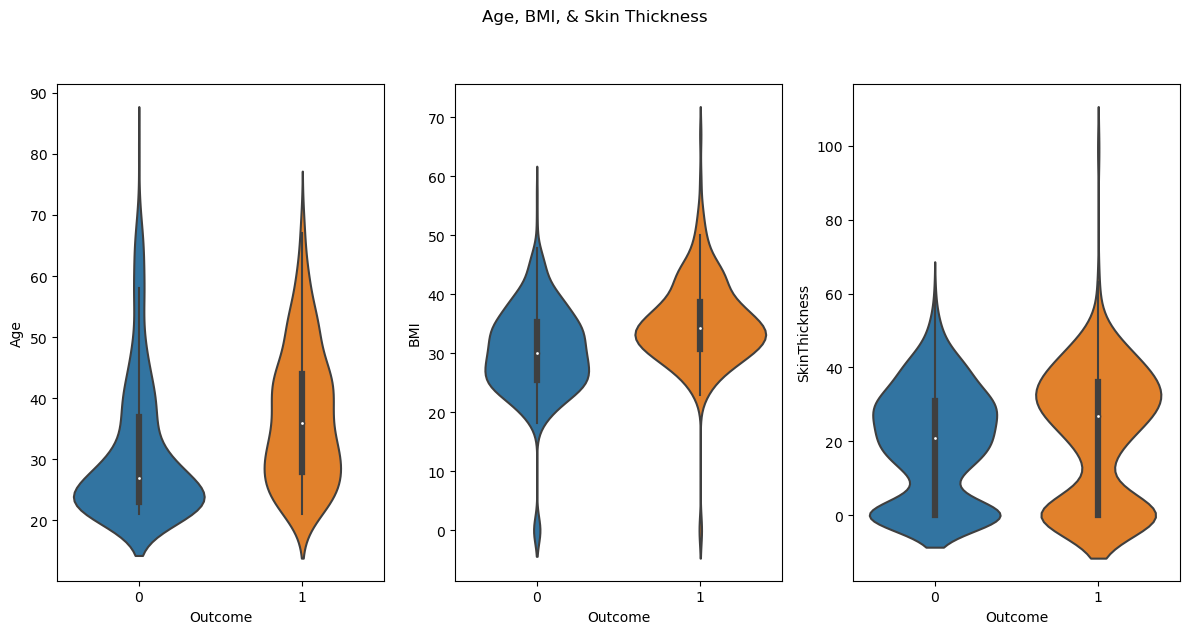

In [66]:
# For Age, BMI, & Skin Thickness
columns = ['Age', 'BMI', 'SkinThickness']

# Create pairs of violin plots
plt.figure(figsize=(12, 6))
for column in columns:
    plt.subplot(1, len(columns), columns.index(column) + 1)
    sns.violinplot(x='Outcome', y=column, data=df)
    plt.xlabel('Outcome')
    plt.ylabel(column)
plt.suptitle('Age, BMI, & Skin Thickness', y=1.05)
plt.tight_layout()
plt.show()

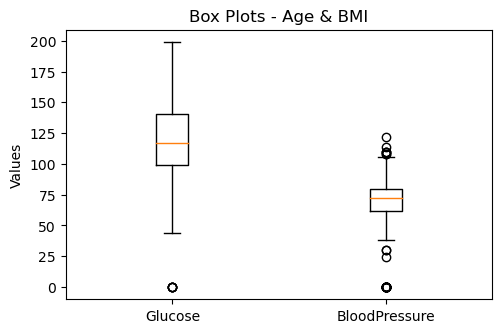

In [68]:
# For Glucose & Blood Pressure
columns = ['Glucose', 'BloodPressure']

# Create the box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot(df[columns], labels=columns)
plt.ylabel('Values')
plt.title('Box Plots - Age & BMI')
plt.show()

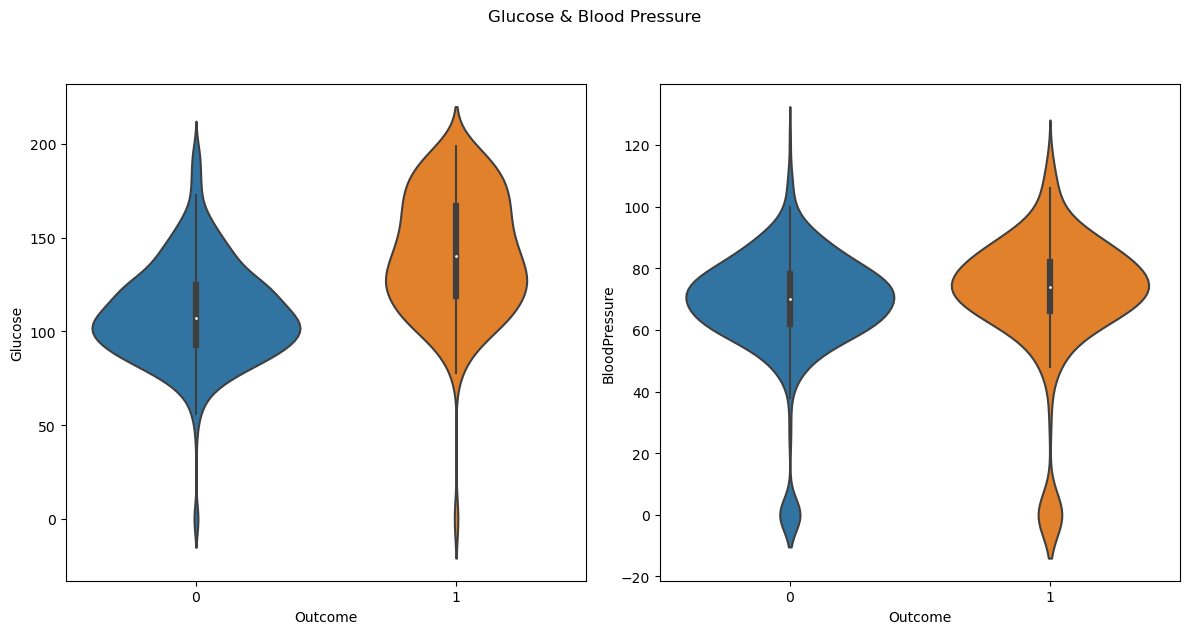

In [123]:
# For Glucose & Blood Pressure
columns = ['Glucose', 'BloodPressure']

# Create pairs of violin plots
plt.figure(figsize=(12, 6))
for column in columns:
    plt.subplot(1, len(columns), columns.index(column) + 1)
    sns.violinplot(x='Outcome', y=column, data=df)
    plt.xlabel('Outcome')
    plt.ylabel(column)
plt.suptitle('Glucose & Blood Pressure', y=1.05)
plt.tight_layout()
plt.show()

I chose to do a pair of box plots, by outcome, for Insulin because of how many outliers there are. I wanted to see if one group had more outliers than the other.

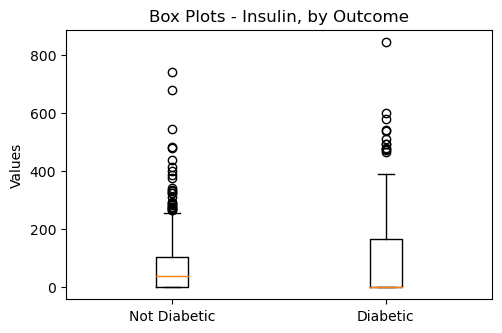

In [82]:
# Insulin
diabetic_no = df[df['Outcome'] == 0]['Insulin']
diabetic_yes = df[df['Outcome'] == 1]['Insulin']

# Create two box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot([diabetic_no, diabetic_yes], labels=['Not Diabetic', 'Diabetic'])
plt.ylabel('Values')
plt.title('Box Plots - Insulin, by Outcome')
plt.show()

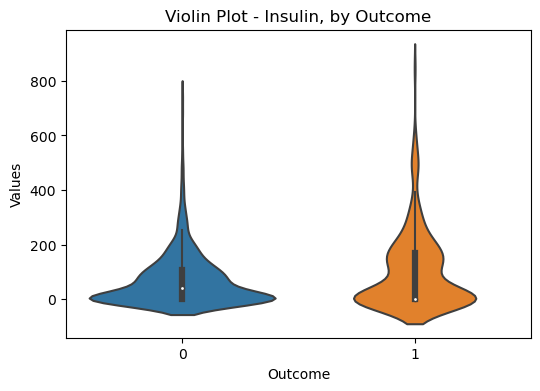

In [80]:
# For Insulin
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['Insulin'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Insulin, by Outcome')
plt.show()

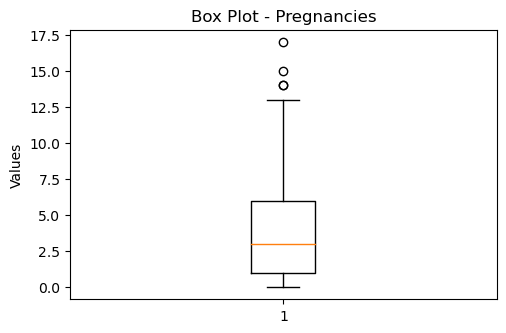

In [81]:
# Pregnancies
plt.figure(figsize=(5.5, 3.5))
plt.boxplot(df['Pregnancies'])
plt.ylabel('Values')
plt.title('Box Plot - Pregnancies')
plt.show()

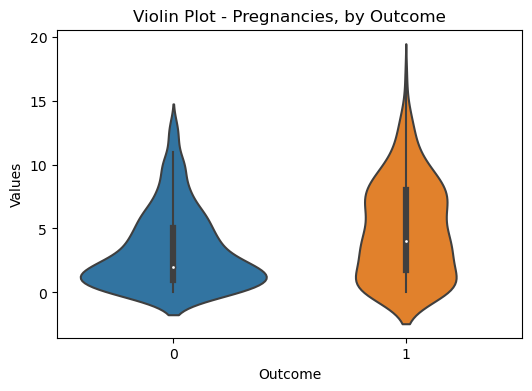

In [91]:
# For Pregnancies
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['Pregnancies'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Pregnancies, by Outcome')
plt.show()

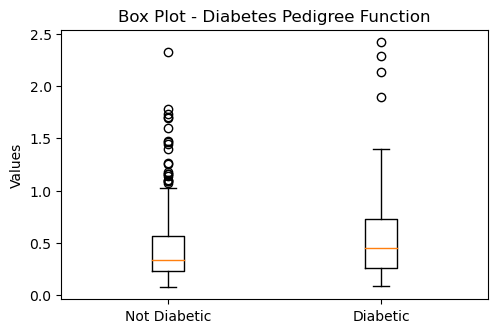

In [93]:
# Diabetes Pedigree Function
diabetic_no = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']
diabetic_yes = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']

# Create two box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot([diabetic_no, diabetic_yes], labels=['Not Diabetic', 'Diabetic'])
plt.ylabel('Values')
plt.title('Box Plot - Diabetes Pedigree Function')
plt.show()

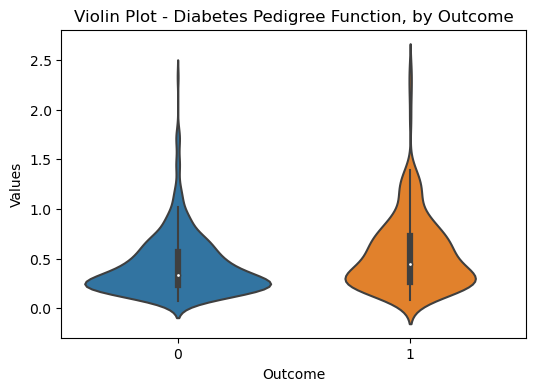

In [95]:
# Diabetes Pedigree Function
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Diabetes Pedigree Function, by Outcome')
plt.show()

### What is the average age of the individuals in the dataset?
Total avg: 33.24

### What is the average glucose level for individuals with diabetes and without diabetes?
Without: 109.98

With: 141.26

### What is the average BMI for individuals with diabetes and without diabetes?
Without: 30.3

With: 35.14

Note: Proper visualizations displayed above; this bit of code just gives exact values for purpose of answering questions.

In [90]:
print(f"Average Age: {df['Age'].mean().round(decimals=2)}")
print('-' * 20)
print(f"Average Glucose, w/o diabetes: {df.loc[(df['Outcome']==0), 'Glucose'].mean().round(decimals=2)}")
print(f"Average Glucose, with diabetes: {df.loc[(df['Outcome']==1), 'Glucose'].mean().round(decimals=2)}")
print('-' * 20)
print(f"Average BMI, w/o diabetes: {df.loc[(df['Outcome']==0), 'BMI'].mean().round(decimals=2)}")
print(f"Average BMI, with diabetes: {df.loc[(df['Outcome']==1), 'BMI'].mean().round(decimals=2)}")

Average Age: 33.24
--------------------
Average Glucose, w/o diabetes: 109.98
Average Glucose, with diabetes: 141.26
--------------------
Average BMI, w/o diabetes: 30.3
Average BMI, with diabetes: 35.14


### How are the predictor variables related to the outcome variable?
#### Answer: Every predictor variable is likely to be higher for the population sample with an outcome of 1 (for diabetic) than it is for the sample with an outcome of 0 (non-diabetic).

### How are the predictor variables related to each other?
In general, there is a weak to moderate correlation between all predictor variables except Pregnancies, which can vary more depending on which other variable relationships you are trying to explain. Pregnancy is most correlated with age and outcome, but otherwise is either weak or negative. Similarly, Age has negative correlations with SkinThickness (a variable that is one of the weakest predictors of diabetes) and Insulin.

### How are the predictor variables related to the outcome variable?
The five strongest correlations, in descending order, are Glucose, BMI, Age, Pregnancies, and DiabetesPedigreeFunction. The remaining predictor variables, Insulin, SkinThickness, and BloodPressure, have a very weak relationship to Outcome and as such may not be reliable predictors. All of these predictor variables average higher for people whose Outcome is 1 (for diabetic) as opposed to 0 (non-diabetic).

### What is the correlation between the predictor variables?
#### See below:

In [115]:
# Full correlation table
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [119]:
# Correlation table for 5 predictors most correlated with Outcome
df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']].corr()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
Glucose,1.000000,0.221071,0.263514,0.129459,0.137337
BMI,0.221071,1.000000,0.036242,0.017683,0.140647
Age,0.263514,0.036242,1.000000,0.544341,0.033561
Pregnancies,0.129459,0.017683,0.544341,1.000000,-0.033523
DiabetesPedigreeFunction,0.137337,0.140647,0.033561,-0.033523,1.000000


### Is there any interaction effect between the predictor variables?
#### Answer: For some of them, yes; for others, not really. See below:

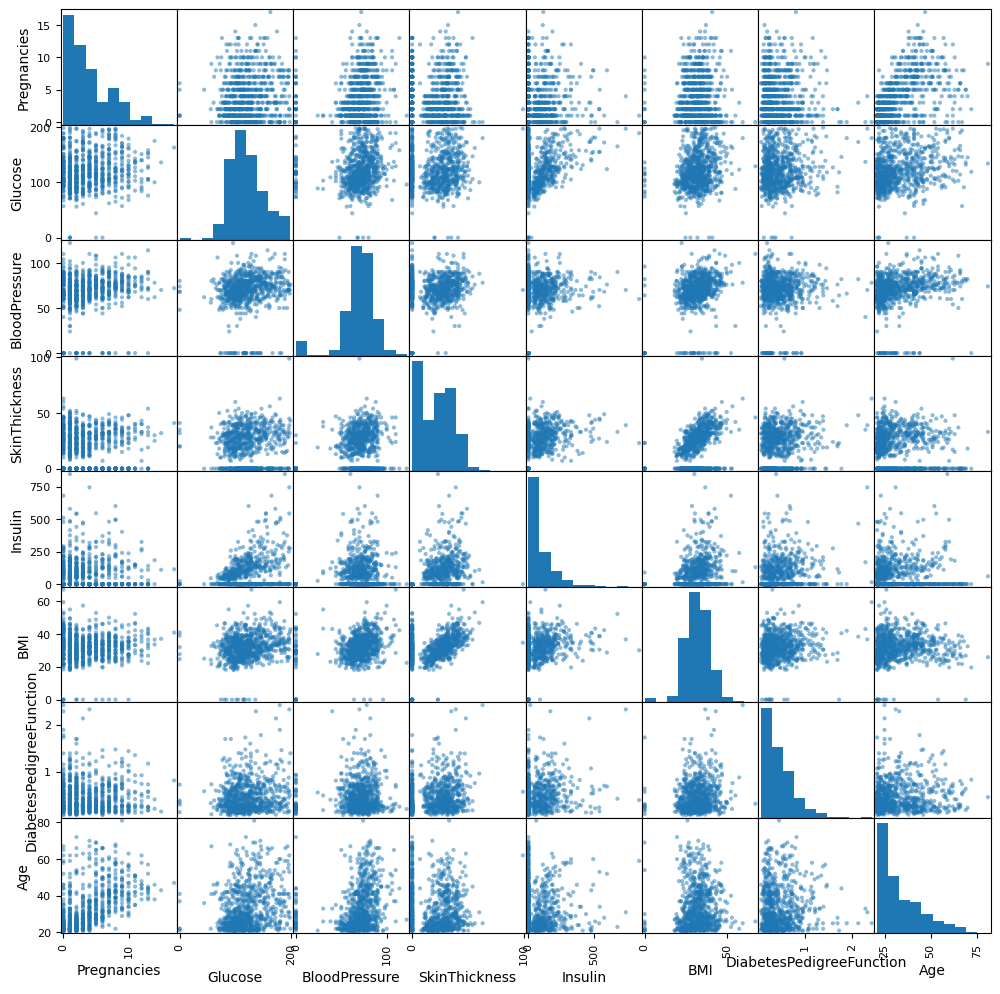

In [122]:
# Create scatter plot matrix
pd.plotting.scatter_matrix(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], figsize=(12, 12))
plt.show()

### Are there any differences in the predictor variables between males and females (if gender information is available)?
#### Answer: While we do not have gender information, we can at least compare variables between people who have been pregnant and people who have not been pregnant.


Trends are kind of visible above, but for clarity here is a new series of violin plots with a new categorical value (0 = has never pregnant, 1 = has been pregnant):

In [136]:
# Set Historical Pregnancy Values
m1 = (df['Pregnancies']==0)
m2 = (df['Pregnancies']>=1)

# Make a new, temporary df with a column that displays "HistoricalPregnancy"
df_preg = df.copy()
df_preg['HistoricalPregnancy'] = np.where(m1, 0, np.where(m2, 1, np.nan)).astype(int)

df_preg.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HistoricalPregnancy
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


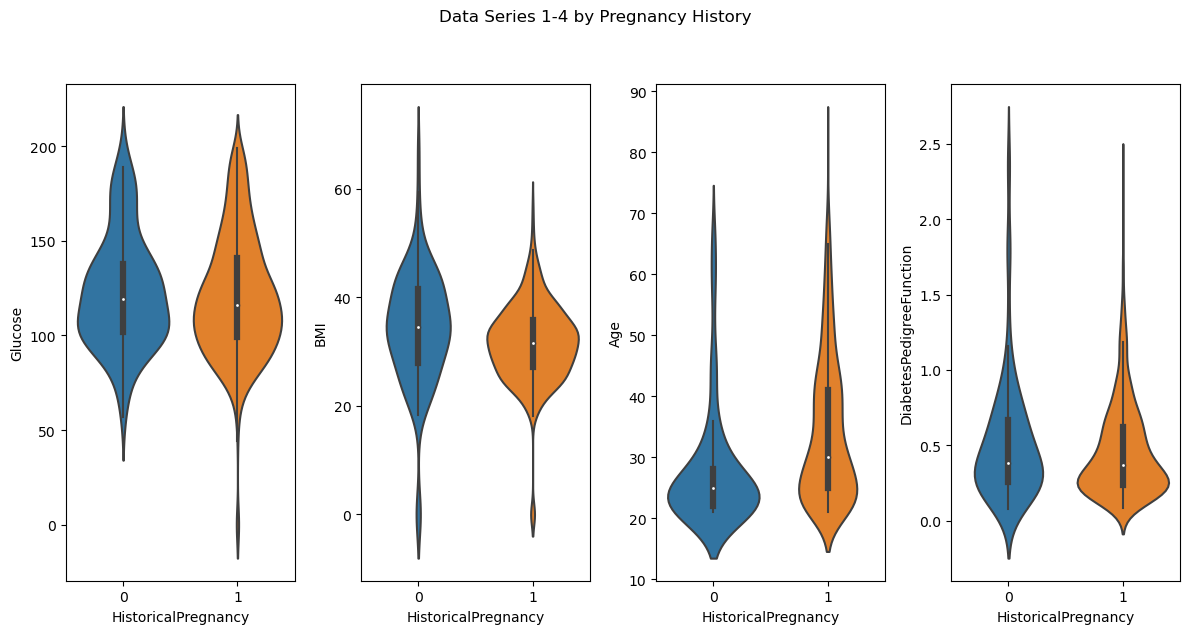

In [144]:
# For Other Top Predictor Variables
columns = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

# Create pairs of violin plots
plt.figure(figsize=(12, 6))
for column in columns:
    plt.subplot(1, len(columns), columns.index(column) + 1)
    sns.violinplot(x='HistoricalPregnancy', y=column, data=df_preg)
    plt.xlabel('HistoricalPregnancy')
    plt.ylabel(column)
plt.suptitle('Data Series 1-4 by Pregnancy History', y=1.05)
plt.tight_layout()
plt.show()

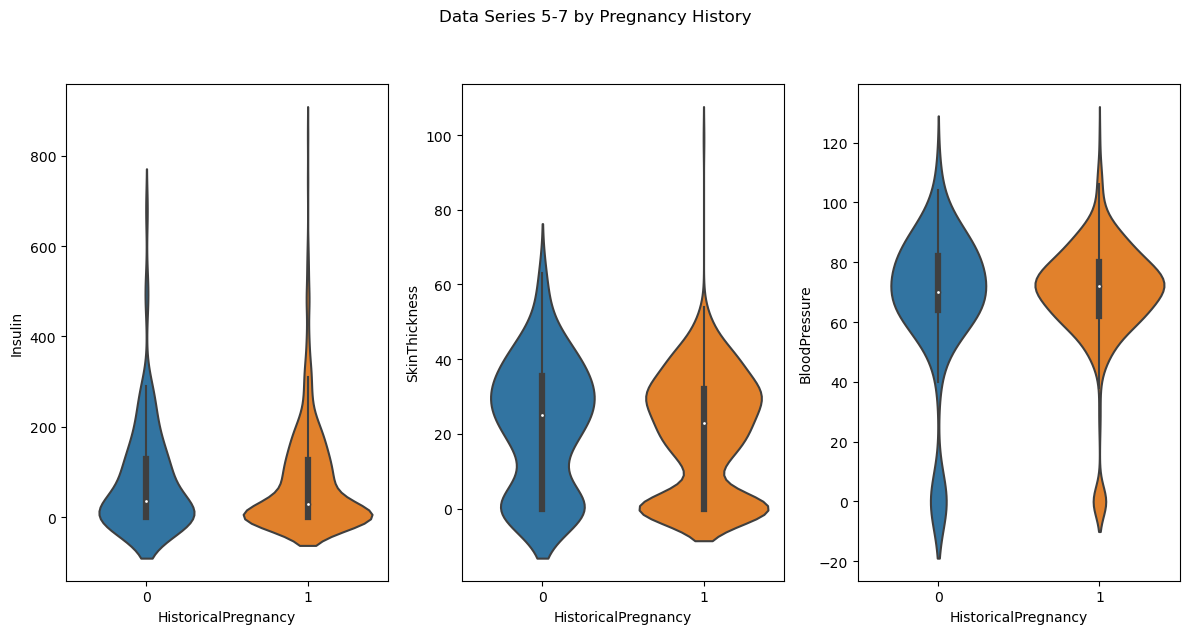

In [145]:
# For Remaining Variables
columns = ['Insulin', 'SkinThickness', 'BloodPressure']

# Create pairs of violin plots
plt.figure(figsize=(12, 6))
for column in columns:
    plt.subplot(1, len(columns), columns.index(column) + 1)
    sns.violinplot(x='HistoricalPregnancy', y=column, data=df_preg)
    plt.xlabel('HistoricalPregnancy')
    plt.ylabel(column)
plt.suptitle('Data Series 5-7 by Pregnancy History', y=1.05)
plt.tight_layout()
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

1. We have lots of 0s where there should be none, but no NaNs. These have been filled with median values, as any remaining outliers will distort calculated means if I use those instead.

In [172]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())

print(df[df.Glucose == 0].shape[0])
print(df[df.BMI == 0].shape[0])
print(df[df.Insulin == 0].shape[0])
print(df[df.BloodPressure == 0].shape[0])
print(df[df.SkinThickness == 0].shape[0])

0
0
0
0
0


2. We have outliers in pretty much every category. Given the nature of the the dataset (medical records), I would normally be hesitant to make any changes without consulting experts on the given data to be absolutely sure they are not mistakes. However, for our purposes I can deal with the most egregious outliers by converting them into median values instead.
    - For example, I left Age alone because the outliers are not unusual (i.e. people who are aged 80+ exist, and there are no persons aged 150+ years old), yet there is one person whose skin is likely not as thick as reported so that needed to change.
    - **I also decided to distinguish between Outcome variables when determining which outliers to remove.** If someone with diabetes is more likely to have higher BMI than someone without diabetes, then outliers that lie just outside the IQR for non-diabetic individuals may fall within the range for diabetic individuals (and vice versa).

In [173]:
# Specify the columns to replace outliers
columns = ['DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BMI', 'Pregnancies']

# Loop through each column
for column in columns:
    # Calculate the median value separately for each Outcome group
    median_0 = df.loc[df['Outcome'] == 0, column].median()
    median_1 = df.loc[df['Outcome'] == 1, column].median()
    
    # Calculate the interquartile range (IQR) separately for each Outcome group
    Q1_0 = df.loc[df['Outcome'] == 0, column].quantile(0.25)
    Q3_0 = df.loc[df['Outcome'] == 0, column].quantile(0.75)
    IQR_0 = Q3_0 - Q1_0
    
    Q1_1 = df.loc[df['Outcome'] == 1, column].quantile(0.25)
    Q3_1 = df.loc[df['Outcome'] == 1, column].quantile(0.75)
    IQR_1 = Q3_1 - Q1_1
    
    # Define the lower and upper bounds for outliers separately for each Outcome group
    lower_bound_0 = Q1_0 - 1.5 * IQR_0
    upper_bound_0 = Q3_0 + 1.5 * IQR_0
    
    lower_bound_1 = Q1_1 - 1.5 * IQR_1
    upper_bound_1 = Q3_1 + 1.5 * IQR_1
    
    # Replace the outliers with the median value separately for each Outcome group
    df.loc[(df['Outcome'] == 0) & ((df[column] < lower_bound_0) | (df[column] > upper_bound_0)), column] = median_0
    df.loc[(df['Outcome'] == 1) & ((df[column] < lower_bound_1) | (df[column] > upper_bound_1)), column] = median_1

Quick comparison plots:

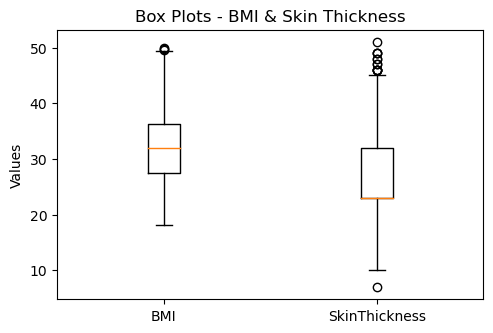

In [398]:
# For BMI, & Skin Thickness
columns = ['BMI', "SkinThickness"]

# Create the box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot(df[columns], labels=columns)
plt.ylabel('Values')
plt.title('Box Plots - BMI & Skin Thickness')
plt.show()

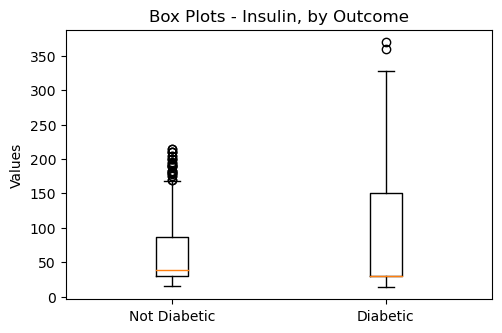

In [175]:
# Insulin
diabetic_no = df[df['Outcome'] == 0]['Insulin']
diabetic_yes = df[df['Outcome'] == 1]['Insulin']

# Create two box plots
plt.figure(figsize=(5.5, 3.5))
plt.boxplot([diabetic_no, diabetic_yes], labels=['Not Diabetic', 'Diabetic'])
plt.ylabel('Values')
plt.title('Box Plots - Insulin, by Outcome')
plt.show()

3. Now we need to determine how these predictor variables should be scaled. We have the following considerations to keep in mind:
    - We need to normalize the data (i.e. set normal distribution).
    - We need to scale the values so that they are all roughly equivalent.
    - I considered binning Age and Pregnancies, but I feel like the raw numerical data could be useful to keep around so I did not do this. If I had, then I would have set up dummy variables for the bins as well.

In [162]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.708333,121.656250,72.386719,26.602865,73.336589,32.212370,0.434952,33.240885,0.348958
std,3.224876,30.438286,12.096642,7.916273,64.623892,6.413736,0.260771,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,105.000000,36.300000,0.586250,41.000000,1.000000
max,17.000000,199.000000,122.000000,51.000000,370.000000,50.000000,1.394000,81.000000,1.000000


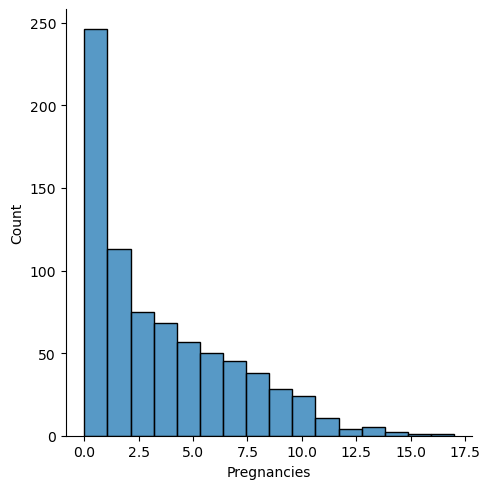

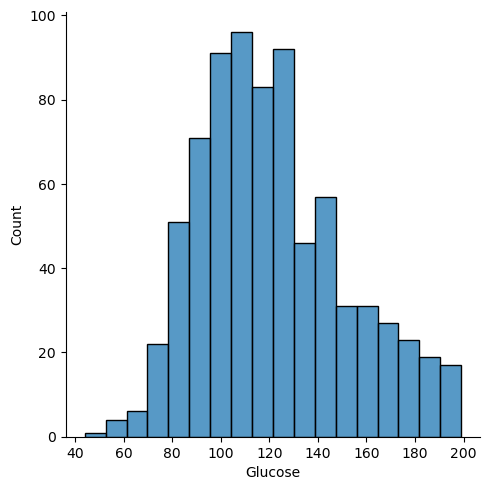

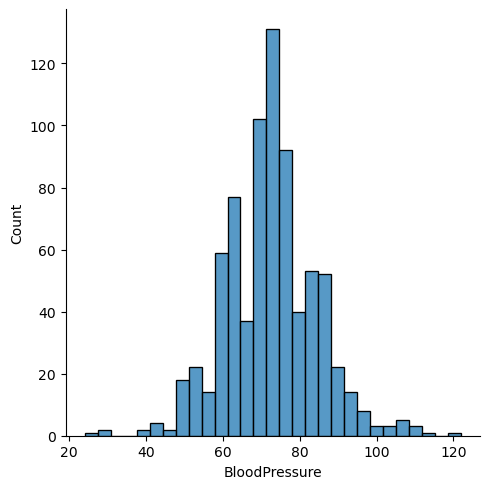

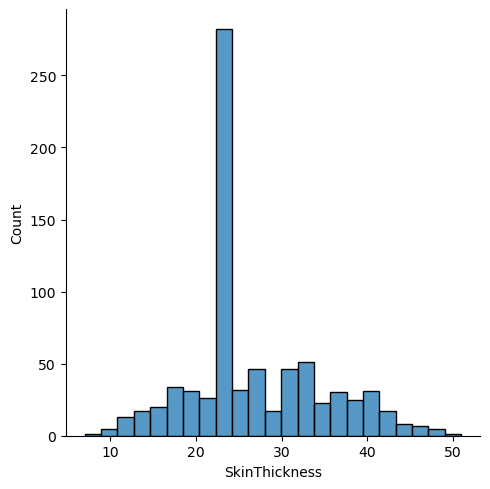

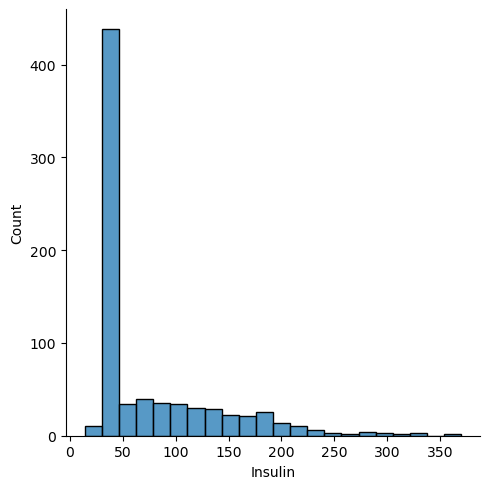

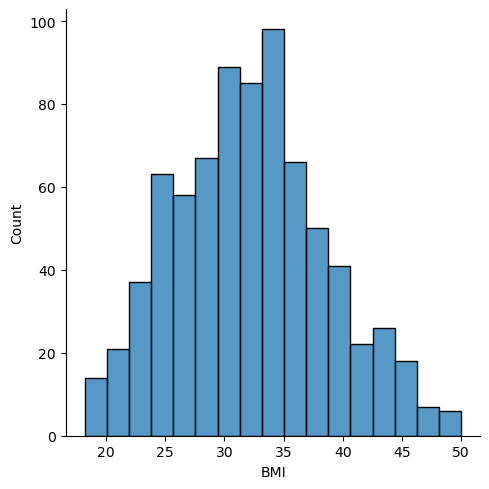

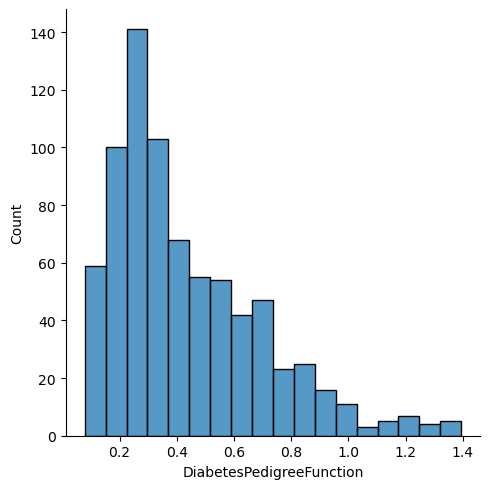

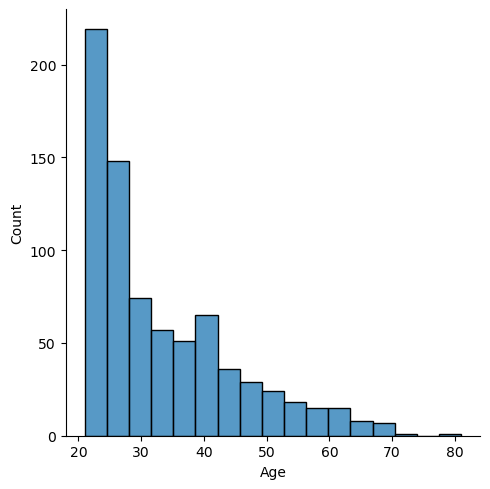

In [168]:
# Checking all plots
sns.displot(df['Pregnancies'])
sns.displot(df['Glucose'])
sns.displot(df['BloodPressure'])
sns.displot(df['SkinThickness'])
sns.displot(df['Insulin'])
sns.displot(df['BMI'])
sns.displot(df['DiabetesPedigreeFunction'])
sns.displot(df['Age'])

As seen above, Pregnancies, Age, and DiabetesPedigreeFunction are skewed, while SkinThickness and Insulin both have a very high jump at one point in the data (Insulin also has a skew to it, but it's not as pronounced so I'll leave it alone for now and adjust if necessary).

Note: I tried to normalize Pregnancies and wound up with infinite values, so I had to undo that.

**From here on out, I also want to work with a new copy of the dataset.**

In [399]:
# New DF:
normal_df = df.copy()

# Normalize Pregnancies, Age, and DPF
normal_df["Age"] = normal_df["Age"].apply(np.log)
normal_df["DiabetesPedigreeFunction"] = normal_df["DiabetesPedigreeFunction"].apply(np.log)

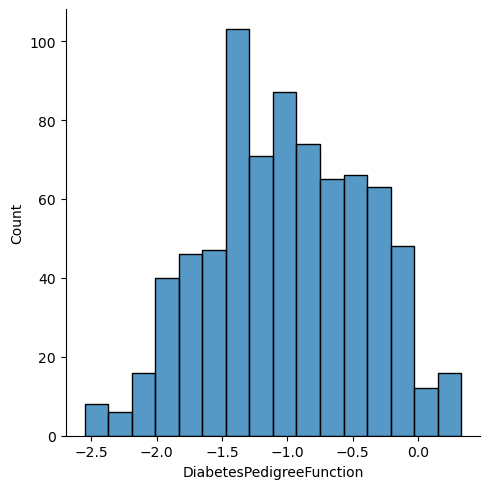

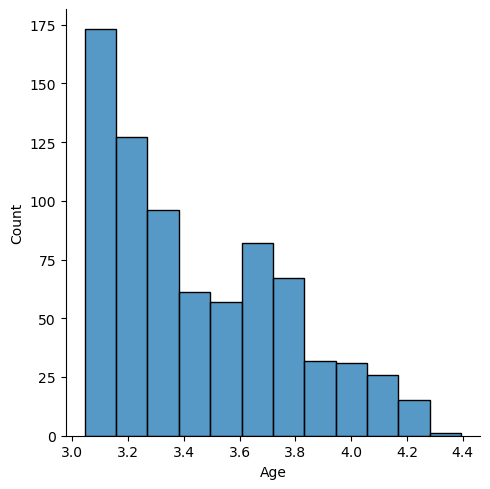

In [400]:
# Plot new versions of Pregnancies, Age, and DPF
sns.displot(normal_df['DiabetesPedigreeFunction'])
sns.displot(normal_df['Age'])

After that, I want to scale all of my predictor variables, like so:

In [401]:
# Extract numeric feature names, minus Outcomes which happens to be the last list element
num_feats = normal_df.dtypes[df.dtypes != 'object'].index.tolist()
num_feats.pop()
num_feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [402]:
scaler = StandardScaler()
normal_df = pd.DataFrame(scaler.fit_transform(normal_df[num_feats]))

In [403]:
normal_df.columns = num_feats
normal_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.711085,0.866045,-0.031990,1.061435,-0.663292,0.216494,0.904687,1.436379
1,-0.840373,-1.205066,-0.528319,0.303008,-0.663292,-0.875625,-0.070807,-0.045939
2,1.331668,2.016662,-0.693761,-0.455418,-0.663292,-1.390481,1.021230,0.052509
3,-0.840373,-1.073567,-0.528319,-0.455418,0.319957,-0.641600,-1.319755,-1.253612
4,-1.150664,0.504422,-2.679076,1.061435,1.465791,1.698655,0.343221,0.147927


4. I do not have any domain knowledge to build off of, and so I can not think of any features I can create. However, I can at least hot-encode Outcome into two separate variables. This is not strictly necessary because the variable is already a binary (0 or 1) value, but I can at least pretend that the original column had categorical strings so that I can demonstrate knowledge on how to do it.

In [404]:
# Dummy vars
outcome_encoded = pd.get_dummies(df['Outcome'], prefix='Outcome')
outcome_encoded

,Outcome_0,Outcome_1
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
763,1,0
764,1,0
765,1,0
766,0,1


In [405]:
# Combine DFs into one
model_df = pd.concat([normal_df, outcome_encoded], axis=1)
model_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_0,Outcome_1
0,0.711085,0.866045,-0.031990,1.061435,-0.663292,0.216494,0.904687,1.436379,0,1
1,-0.840373,-1.205066,-0.528319,0.303008,-0.663292,-0.875625,-0.070807,-0.045939,1,0
2,1.331668,2.016662,-0.693761,-0.455418,-0.663292,-1.390481,1.021230,0.052509,0,1
3,-0.840373,-1.073567,-0.528319,-0.455418,0.319957,-0.641600,-1.319755,-1.253612,1,0
4,-1.150664,0.504422,-2.679076,1.061435,1.465791,1.698655,0.343221,0.147927,0,1
...,...,...,...,...,...,...,...,...,...,...
763,1.952251,-0.679069,0.298896,-0.455418,1.651602,0.107282,-1.279956,2.153023,1,0
764,-0.530081,0.011301,-0.197433,0.050200,-0.663292,0.715748,-0.124345,-0.474323,1,0
765,0.400793,-0.021574,-0.031990,-0.455418,0.598673,-0.938032,-0.675326,-0.147616,1,0
766,-0.840373,0.142800,-1.024647,-0.455418,-0.663292,-0.329566,-0.080416,1.244513,0,1


5. Lastly, I need to properly balance my data. I noted earlier that the Outcome 1 class represents only an approximate 35% of the total sample size. I can resample the data, but with many methods of doing so I run the risk of either removing data that my models can learn from, or else training them to memorize other data and place more emphasis on it than necessary. In other words, I can either overfit or underfit my data (neither of which I want to do).
    - As such, I considered a few options. 
        - I can resample the data, for which I already discussed some of the pros and cons. While these can be minimized, I am also operating under the assumption that medical records like what are being discussed should probably be kept as-is. I also don't know what the prevalence of diabetes is in the general population, and as such am concerned about the possibility of having a model that has too many false positives. 
        - I can artificially inflate the smaller class (1 - Diabetic) with randomised results, which can work but some of the variables are too similar between both classes so I am less comfortable with this option.
        - I can adjust the threshold I use for my models; that way each of the two classes I have available are weighed differently, allowing them to be more sensitive to my positive class (0 = negative for diabetes, 1 = positive for diabetes).
        
With everything in mind, I decided to go with my third option but this requires I have a model to tune first. Therefore, that is where I will handle the data imbalance.

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

1. I decided to go with two models, based on the criteria of the assignment. We can choose any models we want, provided one of them is an ensemble model.

As such, I went with Logistic Regression, followed by a Decision Tree, and then used a Random Forest. 

### Model Prep: Create Train and Test Samples
I did this separately so that the same samples can be used to train and test each model (without having to repeat code).

In [796]:
# Define variables; Outcome is what I want to predict based on other variables
X = model_df.drop(['Outcome_0', 'Outcome_1'], axis=1)
y = model_df['Outcome_1']

# Split the data into training and testing sets; a seed is set given to allow for reproduction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [644]:
# Check shapes
X_train.shape, X_test.shape

((576, 8), (192, 8))

### Model 1: Logistic Regression

In [797]:
# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = logreg.predict_proba(X_test)[:, 1]

# Adjust the prediction threshold
threshold = 0.65
y_pred_adjusted = (y_prob >= threshold).astype(int)

# Evaluate the model performance
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_adjusted))
print('-' * 40)
print("Classification Report: \n", classification_report(y_test, y_pred_adjusted))

Confusion Matrix: 
 [[117   9]
 [ 29  37]]
----------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       126
           1       0.80      0.56      0.66        66

    accuracy                           0.80       192
   macro avg       0.80      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



On its own, a one-off model will give somewhat variable results but I consistently get precision and accuract scores between around 70% to 80%, being 80% on the dot with seed 23. However, I also want to check my model's AUC-score.

In [798]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_prob)
print(auc)

0.8822751322751323


With a set seed of 23, I get an approximate score of 0.88.

### Model 2: Decision Tree

In [702]:
# Create and fit the decision tree model
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_gini.fit(X_train, y_train)

# Prediction
y_pred_gini = dt_gini.predict(X_test)

# Adjust the prediction threshold
threshold = 0.65
y_pred = (y_pred_gini >= threshold).astype(int)

# Evaluate the model performance
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print('-' * 40)
print("Classification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[105  21]
 [ 27  39]]
----------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       126
           1       0.65      0.59      0.62        66

    accuracy                           0.75       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.75      0.75      0.75       192



In [703]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_pred)
print(auc)

0.712121212121212


My Decision Tree is less accurate than the Logistic Regression model with the data I have.

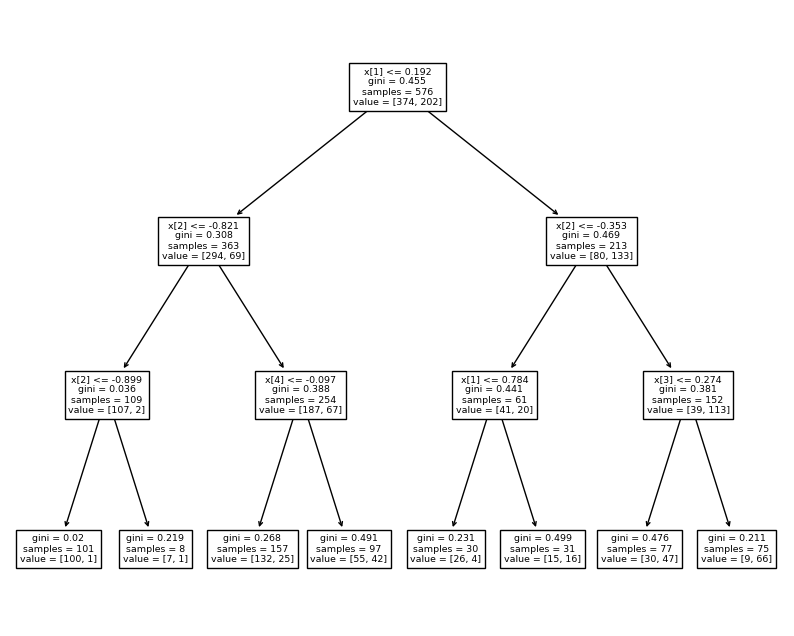

In [623]:
# Quick visualization
plt.figure(figsize=(10,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) ;

### Model 3: Random Forest

In [805]:
# Create and fit the Random Forest model
rfc = RandomForestClassifier(n_estimators=100, random_state=23)
rfc.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = rfc.predict_proba(X_test)

# Choose the positive class probabilities
y_prob_positive = y_prob[:, 1]

# Adjust the prediction threshold
threshold = 0.65
y_pred = (y_prob_positive >= threshold).astype(int)

# Evaluate the model performance
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_adjusted))
print('-' * 40)
print("Classification Report: \n", classification_report(y_test, y_pred_adjusted))

# Calculate AUC score
auc = roc_auc_score(y_test,y_prob_positive)
print(f"AUC score: {auc}")

Confusion Matrix: 
 [[117   9]
 [ 29  37]]
----------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       126
           1       0.80      0.56      0.66        66

    accuracy                           0.80       192
   macro avg       0.80      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

AUC score: 0.8896103896103896


And this model is the most accurate of the three, narrowly edging out my Logistic Regression model in terms of overall accuracy but also giving consistently better results when no seed is used.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

I discussed several findings throughout this notebook, but to summarize some of the more notable points:

    1. The largest correlations with diabetes Outcome are Glucose, BMI, Age, number of Pregnancies, and DiabetesPedigreeFunction (i.e. inheritance). Of these, Glucose is the biggest predictor of diabetes by a large margin, followed by BMI and Age.
       
    2. The original dataset had imputed 0s in place of missing values in a number of cases, which distorts the data somewhat. I chose to assign median values to these entries to minimize the impact they would have on the model, but having this data properly filled from the onset would produce more reliable end results. Because this data was missing, I can not be 100% sure if my analysis of the predictor variables is entirely accurate; that said, it is likely given what the violin plots show for these variables.
    
    3. Even with an imbalanced dataset, I was still able to get a near-90% accuracy rating with an ensemble algorithm (Random Forest) by shifting the prediction threshold, and depending on the luck of the roll could get relatively accurate results from my Logistic Regression algorithm. A single Decision Tree on its own may not be the most accurate, but consolidating several trees into one model allows for a democratic process to decide on a consensus that leads to more accurate predictions.
    
    4. Determining the best threshold value to use for my models was challenging, since setting a seed means that my results will always be the same but getting results without a seed leads to the models in question generating everything differently every time (accuracy, F1-score, etc.) for close thresholds. I settled on 0.65, which is close to the difference between non-diabetic (65.11%) and diabetic (34.89%) individuals.

#### Presentation/PDF Visualizations (relevant to points 1 and 2)

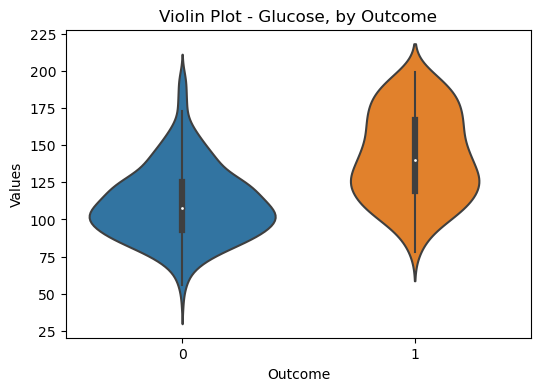

In [632]:
# For Glucose
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['Glucose'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Glucose, by Outcome')
plt.show()

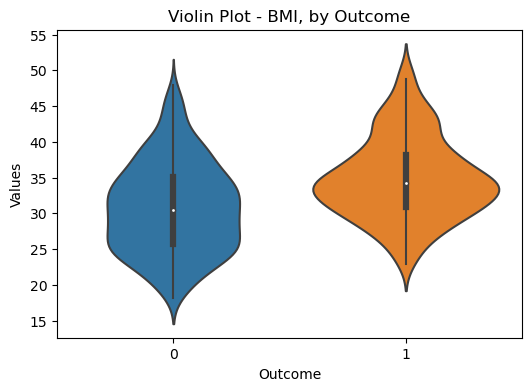

In [633]:
# For BMI
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['BMI'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - BMI, by Outcome')
plt.show()

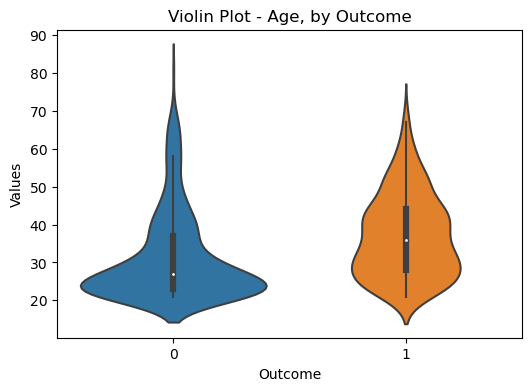

In [634]:
# For Age
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['Age'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Age, by Outcome')
plt.show()

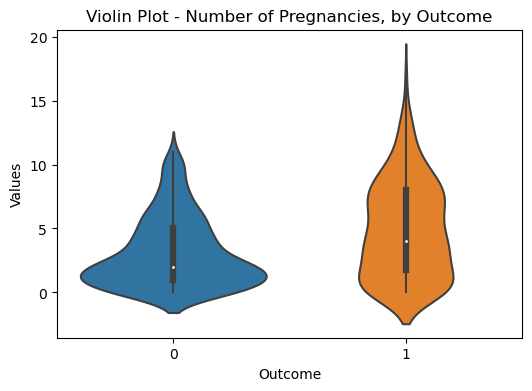

In [635]:
# For Pregnancies
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['Pregnancies'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Number of Pregnancies, by Outcome')
plt.show()

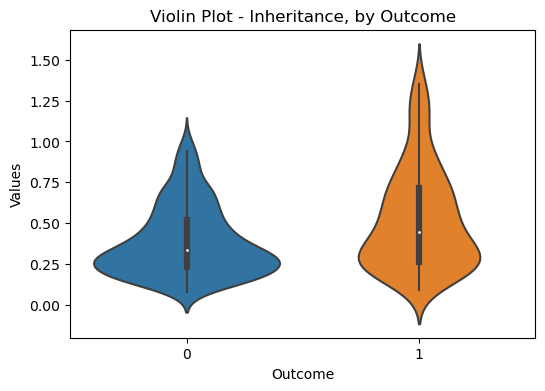

In [637]:
# For DPF
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])
plt.xlabel('Outcome')
plt.ylabel('Values')
plt.title('Violin Plot - Inheritance, by Outcome')
plt.show()

In [641]:
# Other presentation stats
print(f"Average Age, w/o diabetes: {df.loc[(df['Outcome']==0), 'Age'].mean().round(decimals=2)}")
print(f"Average Age, with diabetes: {df.loc[(df['Outcome']==1), 'Age'].mean().round(decimals=2)}")
print('-' * 20)
print(f"Average no. of Pregnancies, w/o diabetes: {df.loc[(df['Outcome']==0), 'Pregnancies'].mean().round(decimals=2)}")
print(f"Average no. of Pregnancies, with diabetes: {df.loc[(df['Outcome']==1), 'Pregnancies'].mean().round(decimals=2)}")
print('-' * 20)
print(f"Average DPF, w/o diabetes: {df.loc[(df['Outcome']==0), 'DiabetesPedigreeFunction'].mean().round(decimals=2)}")
print(f"Average DPF, with diabetes: {df.loc[(df['Outcome']==1), 'DiabetesPedigreeFunction'].mean().round(decimals=2)}")

# After preprocessing:
print('-' * 20)
print(f"Average Glucose, w/o diabetes: {df.loc[(df['Outcome']==0), 'Glucose'].mean().round(decimals=2)}")
print(f"Average Glucose, with diabetes: {df.loc[(df['Outcome']==1), 'Glucose'].mean().round(decimals=2)}")
print('-' * 20)
print(f"Average BMI, w/o diabetes: {df.loc[(df['Outcome']==0), 'BMI'].mean().round(decimals=2)}")
print(f"Average BMI, with diabetes: {df.loc[(df['Outcome']==1), 'BMI'].mean().round(decimals=2)}")

Average Age, w/o diabetes: 31.19
Average Age, with diabetes: 37.07
--------------------
Average no. of Pregnancies, w/o diabetes: 3.09
Average no. of Pregnancies, with diabetes: 4.87
--------------------
Average DPF, w/o diabetes: 0.39
Average DPF, with diabetes: 0.52
--------------------
Average Glucose, w/o diabetes: 110.68
Average Glucose, with diabetes: 142.13
--------------------
Average BMI, w/o diabetes: 30.78
Average BMI, with diabetes: 34.88


Final note: Glucose/BMI averages shifted after filling missing data and removing outliers, but they did not change substantially because I utilised median imputation. 